# Logistic Regression
逻辑回归的优缺点
> 优点：计算代价不高,易于理解和实现。<br>
> 缺点：容易欠拟合,分类精度可能不高。<br>
> 适用数据类型：数值型和标称型数据。

逻辑回归的一般过程
> 1. 收集数据:采用任意方法收集数据。
> 2. 准备数据:由于需要进行距离计算,因此要求数据类型为数值型。另外,结构化数据格式则最佳。
> 3. 分析数据:采用任意方法对数据进行分析。
> 4. 训练算法:大部分时间将用于训练,训练的目的是为了找到最佳的分类回归系数。
> 5. 测试算法:一旦训练步骤完成,分类将会很快。
> 6. 使用算法:首先,我们需要输入一些数据,并将其转换成对应的结构化数值;接着,基于训练好的回归系数就可以对这些数值进行简单的回归计算,判定它们属于哪个类别;在这之后,我们就可以在输出的类别上做一些其他分析工作。

## 1. 使用梯度上升方法最优化参数

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### a. 梯度上升算法

In [24]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    """梯度上升"""
    
    # 将传入的数组转化成numpy数组
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    # 初始化权重参数矩阵
    weights = np.ones((n, 1))
    # 执行梯度上升
    for k in range(maxCycles):
        h = sigmoid(dataMatrix @ weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.T * error
    return weights

In [25]:
dataArr, labelMat = loadDataSet()
dataArr[:3], labelMat[:3]

([[1.0, -0.017612, 14.053064],
  [1.0, -1.395634, 4.662541],
  [1.0, -0.752157, 6.53862]],
 [0, 1, 0])

In [26]:
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## b. 绘制决策边界

In [27]:
def plotBestFit(weights):
    """绘制数据样本和决策边界"""
    
    weights = np.array(weights)
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = dataArr.shape[0]     # 样本数量
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    # 正反样本分离
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    # 绘制散点图
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='blue')
    # 绘制决策边界
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

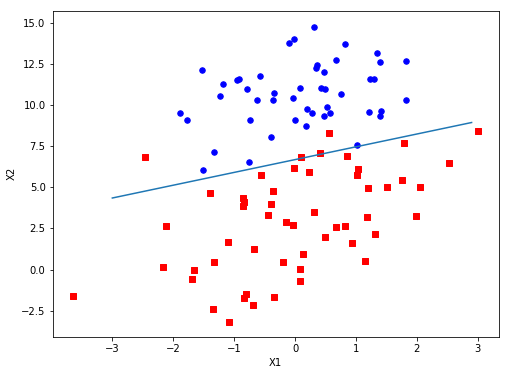

In [33]:
plotBestFit(weights)

## 2. 随机梯度上升
为了使算法适应大量样本的情形，使用随机梯度上升的方法，也成为在线学习，一次仅使用一个样本参与训练。<br>
原始的随机梯度上升算法如下，只使用一个样本点来更新参数：

In [30]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [34]:
wei = stocGradAscent0(np.array(dataArr), labelMat)
wei

array([ 1.01702007,  0.85914348, -0.36579921])

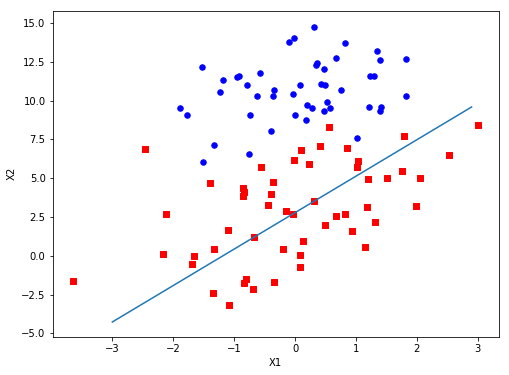

In [35]:
plotBestFit(wei)

从上图可以看出，一次只迭代一个样本点，遍历整个数据集后得到的结果确实不如将整个数据集迭代500次得到的结果。<br>
为了加快避免权重在迭代过程中的波动和加快收敛速度，我们将算法重复执行一定次数，并且在执行过程中修改参数alpha以加速收敛。

In [36]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    """改进版的随机梯度上升算法
    使用随机的一个样本来更新回归系数，并将算法重复执行numIter次。
    """
    m, n = dataMatrix.shape
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # alpha随着每次迭代值都会变小，但不会为0
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

[14.50132111  1.21165179 -2.29000353]


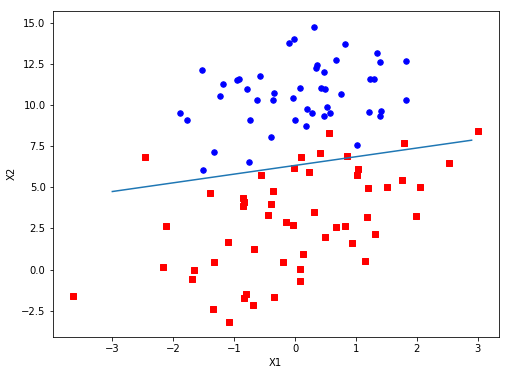

In [37]:
weights = stocGradAscent1(np.array(dataArr), labelMat)
print(weights)
plotBestFit(weights)

从图中可以看出得到了一个和批量梯度上升差不多的结果，但是随机梯度上升使用的计算量更少。

## 3. 使用逻辑回归从疝气病症预测病马的死亡率
> 1. 收集数据:给定数据文件。
> 2. 准备数据:用Python解析文本文件并填充缺失值。
> 3. 分析数据:可视化并观察数据。
> 4. 训练算法:使用优化算法,找到最佳的系数。
> 5. 测试算法:为了量化回归的效果,需要观察错误率。根据错误率决定是否回退到训练阶段,通过改变迭代的次数和步长等参数来得到更好的回归系数。
> 6. 使用算法:实现一个简单的命令行程序来收集马的症状并输出预测结果。

这里使用的数据是经过处理的，原始数据中有缺失值。这里对特征丢失的样本，将缺失特征置为0，对标签丢失的样本直接丢弃。<br>
常用的缺失值处理方法：
> 1. 使用可用特征的均值来填补缺失值;
> 2. 使用特殊值来填补缺失值,如1;
> 3. 忽略有缺失值的样本;
> 4. 使用相似样本的均值添补缺失值;
> 5. 使用另外的机器学习算法预测缺失值。

In [49]:
def classifyVector(inX, weights):
    """分类函数，根据输出的概率判定类别"""
    prob = sigmoid(np.sum(inX * weights))
    if prob > 0.5: return 1.0
    else: return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    # 解析训练集中的特征，trainingSet中存储特征值，trainingLabels中存储标签
    for line in frTrain.readlines():
        # currLine: 所有特征列表
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):    # 20为特征数目，最后一列为分类标签
            lineArr.append(float(currLine[i]))
        # 将每个样本的特征值加入到训练集中
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    # 执行500次随机梯度下降
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    # 使用测试集进行测试
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    # 计算在测试集上的错误率
    errorRate = float(errorCount) / numTestVec
    print("The error rate of this test is: {:.2f}".format(errorRate))
    return errorRate

def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("After {} iterations the average error rate is: {:.2f}".format(numTests, errorSum / float(numTests)))

In [50]:
multiTest()

The error rate of this test is: 0.30
The error rate of this test is: 0.37
The error rate of this test is: 0.36
The error rate of this test is: 0.28
The error rate of this test is: 0.22
The error rate of this test is: 0.34
The error rate of this test is: 0.30
The error rate of this test is: 0.36
The error rate of this test is: 0.36
The error rate of this test is: 0.40
After 10 iterations the average error rate is: 0.33
